# What causes the death from Heart Failure?

## Can we find it through Data Aanalysis?


**For this analysis, I am going to use "Heart Failure Prediction" data from this source**

*source : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data*

False means the patient does not have the symptom or condition.

Positive means the patient does have the symptom or condition.

***Columns***
1. Age - Patient's age
2. Anaemia - Patient's anaemia status (0: False, 1: Positive)
3. creatinine_phosphokinase
4. diabetes - (0: False, 1: Positive)
5. ejection_fraction - in %
6. high_blood_pressure - (0: False, 1: Positive)
7. platelets - the level of platelets in kiloplatelets/ml
8. serum_creatinine - the level of creatinine in mg/dl
9. serum_sodium - the level of sodium in mEq/L
10. sex - (0: Female, 1: Male)
11. smoking - (0: No, 1: Yes)
12. time - Observation time period
13. Death_event - (0: Survived, 1: deceased)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# reading the dataset
bring_data = os.path.join(r'C:\Users\andre\Desktop\Time_Series_Data\Data_Analysis', 'heart_failure_clinical_records_dataset.csv')

df = pd.read_csv(bring_data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Always look into the dataset and its columns first

print("The shape of the DataFrame : {}".format(df.shape))
# There are 13 columns and 299 rows

print("The dimension of the DataFrame : {}".format(df.ndim))


The shape of the DataFrame : (299, 13)
The dimension of the DataFrame : 2


In [4]:
# check if there is any missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
"""
I see that all of 'non-null' values are 299, therefore this dataset is clean

There are 3 float data types and 10 integer data types, must consider which datatype is considered as 'categorical'
ex) DEATH_EVENT, smoking, sex, anaemia, diabetes, high_blood_pressure

"""
None


In [6]:
# look for Balanced and Imbalanced data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
"""
Data values that have minimum of 0 and maximum of 1 indicate they are categorical. 

However if the standard deviation (std) is far from 'mean' value, that means the data is imbalanced to either 0 or 1. 
For instance, Sex has mean value of approximately 0.32 but its std is approximately 0.1466 higher, meaning there are more 
Male patients recorded in this data. 

so far, just by looking at numbers, categorical datasets do not show great imbalance. 

But other datasets like 'platelets' and 'serum_sodium' show great imbalance.
It is hard to imagine how many datasets are far from the mean value, we can visualize these outliers. 


"""
None

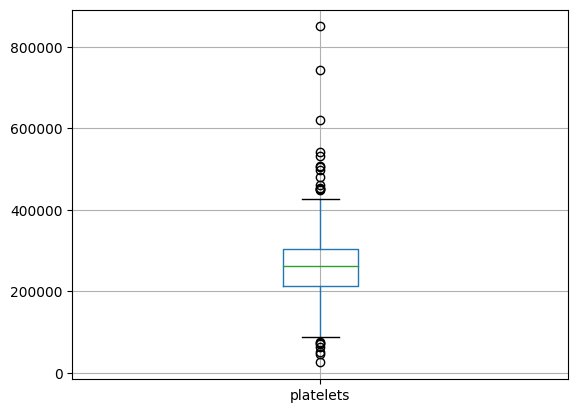

In [8]:
# Visualizing Outliers

# using the boxplot from Matplotlib to visualize Outliers in "platelets"
df.boxplot(column=["platelets"])
plt.show()

In [12]:
"""
There are more imbalanced datasets towards high level of platelets. 

For some Data, this sort of imbalanced datasets may cause incorrect results,
so they have to be removed before analyzing the data or we could still use those datasets by converting to log.

But for this analysis, those outliers will not be removed because even the high level of platelets among recorded patients
could mean something. 




"""
None

## Relationship between the patient's age and death_event

In [ ]:
# Create Age_range dataset to narrow down the age group. 
age_range = 10
df['age_range'] = (df['age'] // age_range) * age_range
df

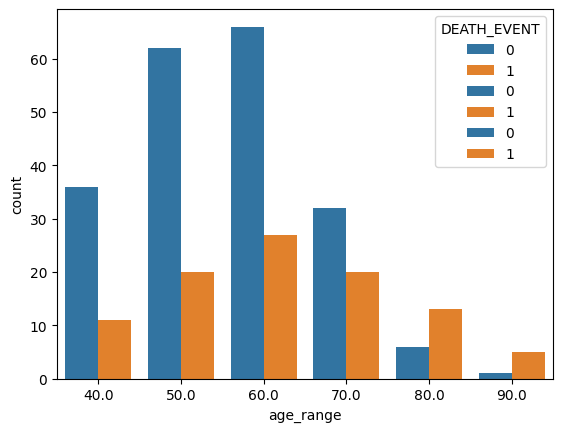

In [49]:
sns.countplot(data=df, x='age_range', hue='DEATH_EVENT')

plt.show()

# As we can see from the countplot from below, the number of survived patients are significantly reduced
# in the age group of 70s and the number of death outnumber the survived patients when it reaches over the age group of 80s
# Thus, it is safe to say that age does play a role when determining the survival rate from a heart failure. 
# However, this is not answer what causes the heart failure. 